In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [2]:
# Making list of file:
path = r'C:\Users\harsh\Downloads\lasio file'
file_list = os.listdir(path)

In [3]:
file_list

['15-9-F-11A.LAS',
 '15-9-F-11B.LAS',
 '15-9-F-1A.LAS',
 '15-9-F-1B.LAS',
 '15-9-F-1C.LAS']

##### saving original data into well_df: 

In [4]:
well_df = [0]*5

In [5]:
well_names = ['15-9-F-11A','15-9-F-11B','15-9-F-1A','15-9-F-1B','15-9-F-1C']

In [6]:
for i in range(len(file_list)):
    file = path + "\\" + file_list[i]
    
    # reading lasio file
    well = lasio.read(file)
    # converting lasio file into dataframe
    df = well.df()
    well_df[i] = df.reset_index()
    # shifting depth column to last position
    well_df[i]['DEPTH'] = well_df[i].pop('DEPTH')
    # giving well names
    well_df[i]['WELL_NAME'] = well_names[i]
    
well1, well2, well3, well4, well5 = well_df

##### test_wells: well2 & well5

#### Cleaning data by removing Null values: 

In [7]:
# clean data:
well_df_clean = [0]*5
train_wells_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT','DEPTH','WELL_NAME']
test_wells_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI','DEPTH','WELL_NAME']

lowest_depth = [0]*5
highest_depth = [0]*5

# well2 and well5 haven't sonic log data:
for i in range(len(well_names)):
    
    if i==1 or i==4:
        well_df_clean[i] = well_df[i][test_wells_cols]
    else:
        well_df_clean[i] = well_df[i][train_wells_cols]
        
    # Dropping Null values: will drop all the rows containing null values
    well_df_clean[i] = well_df_clean[i].dropna()
    
    # Determining lowest and highest depth for all the wells:
    lowest_depth[i] = well_df_clean[i]['DEPTH'].min()
    highest_depth[i] = well_df_clean[i]['DEPTH'].max()
        
wellc1, wellc2, wellc3, wellc4, wellc5 = well_df_clean # here wellc represents the cleaned data

In [8]:
lowest_depth

[2577.0, 3198.2, 2619.8, 3098.5, 3057.2]

In [9]:
highest_depth

[3723.3, 4744.7, 3642.1, 3424.6, 4067.4]

In [10]:
train_wells = pd.concat([wellc1, wellc3, wellc4], axis = 0, ignore_index = True)

In [11]:
train_wells['RT'] = np.log10(train_wells['RT'])

In [12]:
train_wells.head()

,NPHI,RHOB,GR,RT,PEF,CALI,DT,DEPTH,WELL_NAME
0,0.403,2.347,74.697,-0.124360,8.136,8.765,109.385,2577.0,15-9-F-11A
1,0.399,2.357,72.797,-0.097997,7.925,8.703,110.132,2577.1,15-9-F-11A
2,0.390,2.360,71.629,-0.124939,7.775,8.703,110.843,2577.2,15-9-F-11A
3,0.385,2.361,69.899,-0.143271,7.592,8.672,111.010,2577.3,15-9-F-11A
4,0.382,2.363,69.041,-0.159267,7.380,8.672,110.797,2577.4,15-9-F-11A


In [13]:
test_wells = pd.concat([wellc2, wellc5], axis = 0, ignore_index = True)

In [14]:
test_wells['RT'] = np.log10(test_wells['RT'])

In [15]:
test_wells.head()

,NPHI,RHOB,GR,RT,PEF,CALI,DEPTH,WELL_NAME
0,0.077,2.599,9.040,0.978865,7.497,8.547,3198.2,15-9-F-11B
1,0.071,2.609,9.933,0.977175,7.447,8.547,3198.3,15-9-F-11B
2,0.069,2.609,10.037,0.976212,7.480,8.547,3198.4,15-9-F-11B
3,0.068,2.606,8.748,0.978226,7.473,8.547,3198.5,15-9-F-11B
4,0.067,2.601,9.243,0.974834,7.430,8.547,3198.6,15-9-F-11B


### Data Normalization:

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [17]:
# columns to be normalized
train_norm_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

tf = PowerTransformer(method = 'yeo-johnson')
ct = ColumnTransformer([('tf1', tf, train_norm_cols)], remainder = 'passthrough')
train_wells_norm = ct.fit_transform(train_wells)

In [18]:
train_wells_norm = pd.DataFrame(train_wells_norm, columns = train_wells_cols)

In [19]:
train_wells_norm

,NPHI,RHOB,GR,RT,PEF,CALI,DT,DEPTH,WELL_NAME
0,1.807855,-0.961972,1.02325,-1.211418,0.97439,2.846444,1.728713,2577.0,15-9-F-11A
1,1.793869,-0.905399,0.998947,-1.145794,0.774508,1.58471,1.750565,2577.1,15-9-F-11A
2,1.761401,-0.888184,0.983687,-1.212862,0.634461,1.58471,1.770988,2577.2,15-9-F-11A
3,1.742745,-0.88242,0.960618,-1.258684,0.465922,0.941993,1.775732,2577.3,15-9-F-11A
4,1.731333,-0.870855,0.948962,-1.298788,0.27388,0.941993,1.769677,2577.4,15-9-F-11A
...,...,...,...,...,...,...,...,...,...
24945,0.454574,-0.343115,0.675409,-0.773917,-0.665565,1.997188,0.117089,3424.2,15-9-F-1B
24946,0.42791,-0.311755,0.698629,-0.740295,-0.581735,2.50966,0.097204,3424.3,15-9-F-1B
24947,0.35679,-0.271598,0.716882,-0.731495,-0.508228,2.513706,0.069669,3424.4,15-9-F-1B
24948,0.347854,-0.252405,0.693705,-0.706253,-0.467707,3.017002,0.044707,3424.5,15-9-F-1B


In [20]:
train_wells_norm.dtypes

NPHI         object
RHOB         object
GR           object
RT           object
PEF          object
CALI         object
DT           object
DEPTH        object
WELL_NAME    object
dtype: object

In [21]:
# other way to change datatype:
# train_wells_norm = pd.concat([train_wells_norm[train_norm_cols].astype(float),train_wells_norm['WELL_NAME'].astype(str),train_wells_norm['DEPTH'].astype(float)], axis = 1)

In [22]:
# changing datatypes to float:

a = train_wells_norm[train_norm_cols].astype(float)
b = train_wells_norm['WELL_NAME'].astype(str)
c = train_wells_norm['DEPTH'].astype(float)

train_wells_norm = pd.concat([a, c, b], axis = 1)

In [23]:
train_wells_norm

,NPHI,RHOB,GR,RT,PEF,CALI,DT,DEPTH,WELL_NAME
0,1.807855,-0.961972,1.023250,-1.211418,0.974390,2.846444,1.728713,2577.0,15-9-F-11A
1,1.793869,-0.905399,0.998947,-1.145794,0.774508,1.584710,1.750565,2577.1,15-9-F-11A
2,1.761401,-0.888184,0.983687,-1.212862,0.634461,1.584710,1.770988,2577.2,15-9-F-11A
3,1.742745,-0.882420,0.960618,-1.258684,0.465922,0.941993,1.775732,2577.3,15-9-F-11A
4,1.731333,-0.870855,0.948962,-1.298788,0.273880,0.941993,1.769677,2577.4,15-9-F-11A
...,...,...,...,...,...,...,...,...,...
24945,0.454574,-0.343115,0.675409,-0.773917,-0.665565,1.997188,0.117089,3424.2,15-9-F-1B
24946,0.427910,-0.311755,0.698629,-0.740295,-0.581735,2.509660,0.097204,3424.3,15-9-F-1B
24947,0.356790,-0.271598,0.716882,-0.731495,-0.508228,2.513706,0.069669,3424.4,15-9-F-1B
24948,0.347854,-0.252405,0.693705,-0.706253,-0.467707,3.017002,0.044707,3424.5,15-9-F-1B


#### removing outliers: 

In [24]:
# using standard deviation:
train_wells_norm_std = train_wells_norm[train_norm_cols][np.abs(train_wells_norm[train_norm_cols] - train_wells_norm[train_norm_cols].mean())<=3*train_wells_norm[train_norm_cols].std()]

Text(0.5, 1.0, 'After Outlier removal')

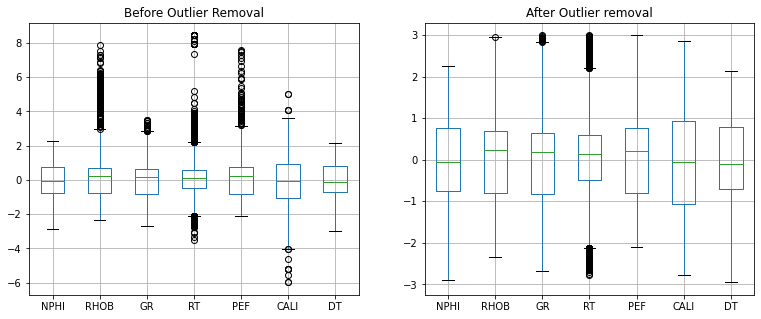

In [25]:
plt.figure(figsize = (13, 5))
plt.subplot(1,2,1)
train_wells_norm[train_norm_cols].boxplot()
plt.title('Before Outlier Removal')

plt.subplot(1,2,2)
train_wells_norm_std[train_norm_cols].boxplot()
plt.title('After Outlier removal')

In [26]:
train_wells_norm_std = train_wells_norm_std.dropna()

In [27]:
train_wells_norm_std

,NPHI,RHOB,GR,RT,PEF,CALI,DT
0,1.807855,-0.961972,1.023250,-1.211418,0.974390,2.846444,1.728713
1,1.793869,-0.905399,0.998947,-1.145794,0.774508,1.584710,1.750565
2,1.761401,-0.888184,0.983687,-1.212862,0.634461,1.584710,1.770988
3,1.742745,-0.882420,0.960618,-1.258684,0.465922,0.941993,1.775732
4,1.731333,-0.870855,0.948962,-1.298788,0.273880,0.941993,1.769677
...,...,...,...,...,...,...,...
24944,0.482951,-0.318750,0.672290,-0.849771,-0.728366,1.477457,0.131127
24945,0.454574,-0.343115,0.675409,-0.773917,-0.665565,1.997188,0.117089
24946,0.427910,-0.311755,0.698629,-0.740295,-0.581735,2.509660,0.097204
24947,0.356790,-0.271598,0.716882,-0.731495,-0.508228,2.513706,0.069669


#### Trainnig the Data:

for training we use normalized data with outliers removed
 -- for testing we use only normalized data
-- because while training outliers may affect the skewness of the data

X_train is our whole data except target column and y_train is traget column only

In [28]:
feature_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
target_cols = ['DT']

In [29]:
X_train = train_wells_norm_std[feature_cols].values
X_train

array([[ 1.80785495, -0.96197241,  1.02324955, -1.21141757,  0.97439021,
         2.84644381],
       [ 1.79386859, -0.90539916,  0.99894677, -1.14579415,  0.77450817,
         1.58470992],
       [ 1.76140063, -0.88818378,  0.98368722, -1.21286155,  0.63446068,
         1.58470992],
       ...,
       [ 0.42790959, -0.31175491,  0.69862938, -0.74029536, -0.58173466,
         2.50965963],
       [ 0.35679035, -0.27159752,  0.7168817 , -0.73149452, -0.50822772,
         2.51370626],
       [ 0.2910723 , -0.24169442,  0.67545085, -0.61260455, -0.46346978,
         2.50965963]])

In [30]:
Y_train = train_wells_norm_std[target_cols].values
Y_train

array([[1.72871315],
       [1.75056532],
       [1.77098765],
       ...,
       [0.0972035 ],
       [0.06966901],
       [0.01986281]])

### Defining Test data for separate wells: 

In [31]:
train_wells_name = ['15-9-F-11A','15-9-F-1A','15-9-F-1B']
x_test = []
y_test = []
for i in range(len(train_wells_name)):
    test = train_wells_norm.loc[train_wells_norm['WELL_NAME'] == train_wells_name[i]]
    x_tests, y_tests = test[feature_cols].values, test[target_cols].values
    x_test.append(x_tests)
    y_test.append(y_tests)
    
x_test1, x_test3, x_test4 = x_test
y_test1, y_test3, y_test4 = y_test

#### Training the model: 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, Y_train)

LinearRegression()

#### Testing the Data: 

X_test used to predict and Y_test used to calculate metrics or error

In [35]:
y_pred1 = model.predict(x_test1)
y_pred3 = model.predict(x_test3)
y_pred4 = model.predict(x_test4)

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(f'r2_score of well1: {r2_score(y_test1, y_pred1)}')
print(f'RMSE of well1: {mean_squared_error(y_test1, y_pred1)}')
print(f'r2_score of well3: {r2_score(y_test3, y_pred3)}')
print(f'RMSE of well3: {mean_squared_error(y_test3, y_pred3)}')
print(f'r2_score of well4: {r2_score(y_test4, y_pred4)}')
print(f'RMSE of well4: {mean_squared_error(y_test4, y_pred4)}')

r2_score of well1: 0.9347898618465503
RMSE of well1: 0.07678843135917499
r2_score of well3: 0.9195935708238648
RMSE of well3: 0.06867171817605883
r2_score of well4: 0.8080092848306676
RMSE of well4: 0.10815628089640143


### Denormalizing the Data: 

In [37]:
y = train_wells[target_cols]
tf.fit(y)

PowerTransformer()

In [38]:
y_test1,y_pred1 = tf.inverse_transform(y_test1), tf.inverse_transform(y_pred1)
y_test3,y_pred3 = tf.inverse_transform(y_test3), tf.inverse_transform(y_pred3)
y_test4,y_pred4 = tf.inverse_transform(y_test4), tf.inverse_transform(y_pred4)

##### Plotting the actual and predicted data: 

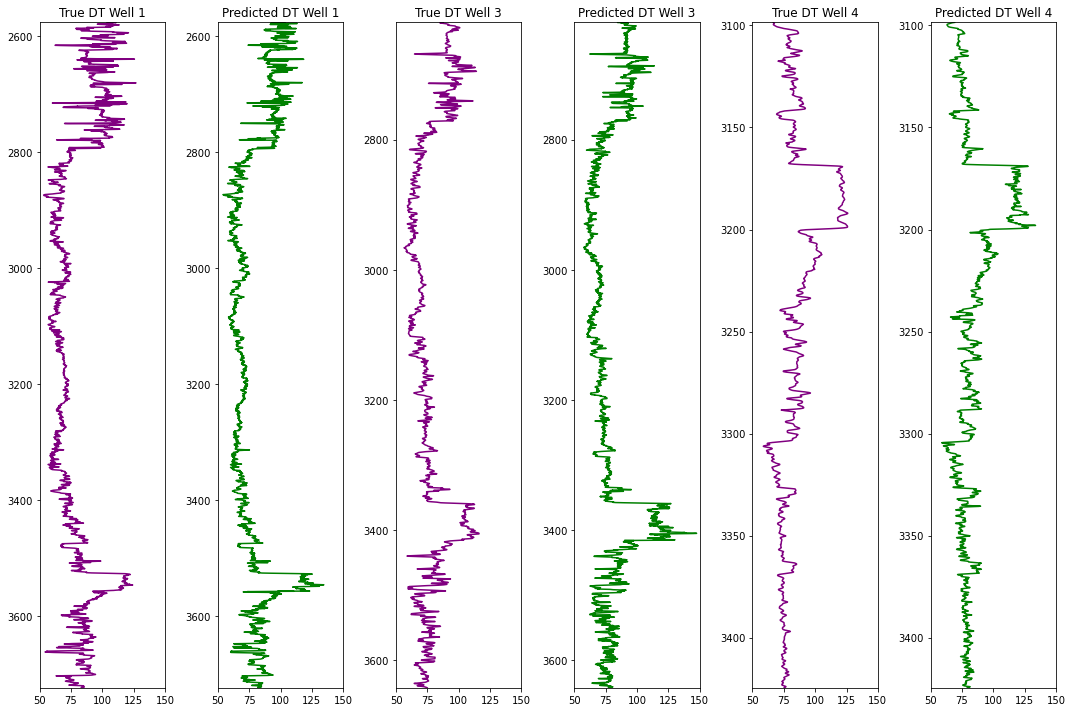

In [39]:
x = [y_test1, y_pred1, y_test3, y_pred3, y_test4, y_pred4]
y = [wellc1['DEPTH'], wellc1['DEPTH'], wellc3['DEPTH'], wellc3['DEPTH'], wellc4['DEPTH'], wellc4['DEPTH']]

color = ['purple', 'green', 'purple', 'green', 'purple', 'green']
title = ['True DT Well 1', 'Predicted DT Well 1', 'True DT Well 3', 'Predicted DT Well 3',
         'True DT Well 4', 'Predicted DT Well 4']

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i in range(len(x)):
    ax[i].plot(x[i], y[i], color=color[i])
    ax[i].set_xlim(50, 150)
    ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
    ax[i].set_title(title[i])

plt.tight_layout()

plt.show()

### Final Prediction:

In [40]:
test_wells_name = ['15-9-F-11B','15-9-F-1C']
pred_well = pd.concat([wellc2, wellc5])

In [41]:
x_test = []

for i in range(len(test_wells_name)):
    test = pred_well[pred_well['WELL_NAME'] == test_wells_name[i]][feature_cols]
    x_test.append(test)

x_test2, x_test5 = x_test

In [42]:
train_norm_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']

# tf = PowerTransformer(method = 'yeo-johnson')
ct = ColumnTransformer([('tf1', tf, train_norm_cols)], remainder = 'passthrough')

In [43]:
x_test2 = ct.fit_transform(x_test2)
x_test5 = ct.fit_transform(x_test5)

In [44]:
y_pred2 = model.predict(x_test2)

In [45]:
y_pred5 = model.predict(x_test5)

#### Plotting Logs: 

In [46]:
y_pred2 = tf.inverse_transform(y_pred2.reshape(-1,1))
y_pred5 = tf.inverse_transform(y_pred5.reshape(-1,1))

In [47]:
y_pred2.shape

(15466, 1)

In [48]:
wellc2['DEPTH'].shape

(15466,)

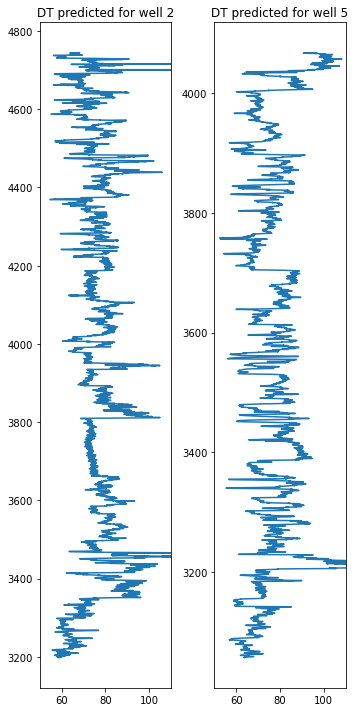

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,10))

ax[0].plot(np.ravel(y_pred2),wellc2['DEPTH'])
ax[0].set_xlim(50, 110)
ax[0].set_title('DT predicted for well 2')
ax[1].plot(np.ravel(y_pred5), wellc5['DEPTH'])
ax[1].set_title('DT predicted for well 5')
ax[1].set_xlim(50,110)

plt.tight_layout()

plt.show()

###### without changing the dimension: 

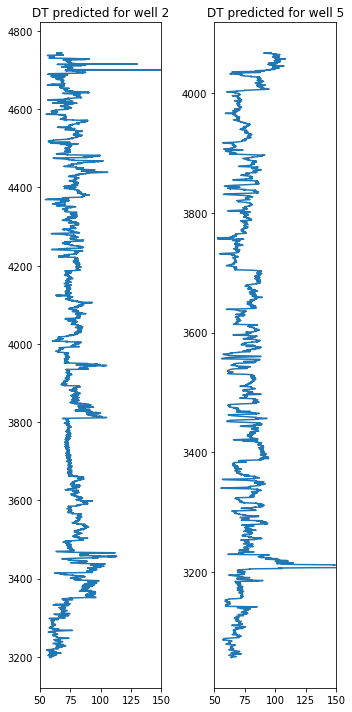

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,10))

ax[0].plot(y_pred2,wellc2['DEPTH'])
ax[0].set_xlim(50, 150)
ax[0].set_title('DT predicted for well 2')
ax[1].plot(y_pred5, wellc5['DEPTH'])
ax[1].set_title('DT predicted for well 5')
ax[1].set_xlim(50,150)

plt.tight_layout()

plt.show()

In [51]:
a['depth'].min()

KeyError: 'depth'

In [ ]:
wellc2['DT'] = y_pred2

In [ ]:
wellc2